<a href="https://colab.research.google.com/github/subratamondal1/sign-language-classification/blob/main/STEMpedia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>American Sign Language Classification using FastAi</center>
The fastai library is a deep learning library for computer vision. It provides a high-level API that makes it easy to train and deploy deep learning models for computer vision tasks.

## ML Workflow
1. **`Business Understanding:`** is to provide a clear and concise overview of the problem domain, the stakeholders, the objectives, and the success criteria of the project.

2. **`Data Understanding & Preparatiion:`** is to provide a comprehensive and detailed analysis of the data that will be used for the project. And to provide a systematic and rigorous process of transforming and integrating the raw data into a suitable format and structure for machine learning.

3. **`Model Selection:`** is to provide a logical and empirical process of choosing the best machine learning model for the project. 

4. **`Training:`** is to provide the prepared data to your machine learning model to find patterns and make predictions.

5. **`Evaluation:`** once the model is trained, it is evaluated on a held-out set of data. This is done to measure the accuracy of the model.

6. **`Deployment:`** The deployment section in machine learning workflow is the step where you take your trained model and make it available for consumption by other applications or users.

## Business Understanding
This project aims to develop a machine learning model that can interpret sign language gestures from images and classify them as english alphabets. This can benefit deaf and hard-of-hearing people. 

FastAi is used as a framework for this project because it simplifies and enhances the deep learning workflow. However, FastAi also requires deep learning knowledge and skills to use it effectively for ASL recognition.

The project is still in its early stages, but it has the potential to make a significant impact on the lives of deaf and hard-of-hearing people. By improving communication and accessibility, this project can help to break down barriers and create a more inclusive society.

Note: You must have a bare minimum knowledge in this field to understand this project efficiently.

### Setup
Import all the required libraries.

In [3]:
# import libraries
import fastai # fastai library
from fastai.vision.all import * # fastai vision

## Data Understanding & Preparation
The data for this project consists of images of hand gestures representing different letters of the American Sign Language (ASL) alphabet. As per now due to performanace issues, only sign A, B, C, D and E are getting used as a dataset, and it contains total of 1652 images.

* We are going to use fastai's **DataLoaders** to load and transform the data.

**`Dataloaders`** are used to create batches of data from a dataset and apply transformations to them. They are a class that wraps PyTorch’s DataLoader and provides additional functionality and flexibility.

We are creating Dataloaders directly from folders. They can also be created from other various sources too, such as CSV files, dataframes, etc, but those are for another day. 

We can also pass Dataloaders to a Learner, which is a fastai class that handles the training loop. 
Dataloaders are extensions of PyTorch’s DataLoader class but with more helpful callbacks and flexibility. They help you to investigate, clean, change and prepare your data before, during and after building your deep learning mode.


In [4]:
# Create dataloaders from folder
dls = ImageDataLoaders.from_folder(
    path = "/content/drive/MyDrive/STEMpedia/data_a_e", 
    valid_pct = 0.2, 
    item_tfms = Resize(460), 
    batch_tfms = aug_transforms(size=224))

Let's understand the above code block.

```python
# data folder structure
    data_a_e
├── A
│   ├── image1.jpg
│   └── image2.jpg
└── B
    ├── image3.jpg
    └── image4.jpg

# Create dataloaders from folder
dls = ImageDataLoaders.from_folder(
    path = "/content/drive/MyDrive/STEMpedia/data_a_e", 
    valid_pct = 0.2, 
    item_tfms = Resize(460), 
    batch_tfms = aug_transforms(size=224))
```

* First argument **`path`:** is the path to the folder where our images are stored. In this case, it is in "/content/drive/MyDrive/STEMpedia/data_a_e". The method assumes that your images are organized in subfolders by class labels.

* Second argument **`valid_pct`:** specifies the percentage of data to use for validation. In this case, it is 0.2, which means 20% of the data will be used for validation and 80% for training.

* Third argument **`item_tfms`:** specifies the transforms to apply to each individual image before batching. In this case, it is Resize(460), which means each image will be resized to 460 pixels on the smaller side while preserving the aspect ratio. 

* Fourth argument **`batch_tfms`:** specifies the transforms to apply to each batch of images after batching. In this case, it is aug_transforms(size=224), which means each batch of images will be randomly augmented (flipped, rotated, zoomed, etc.) and resized to 224 pixels on each side. This helps prevent overfitting and improve generalization. The method also applies normalization using the ImageNet statistics by default.

Once the DataLoaders object is created, it can be passed to a Learner object to train a model on your data.

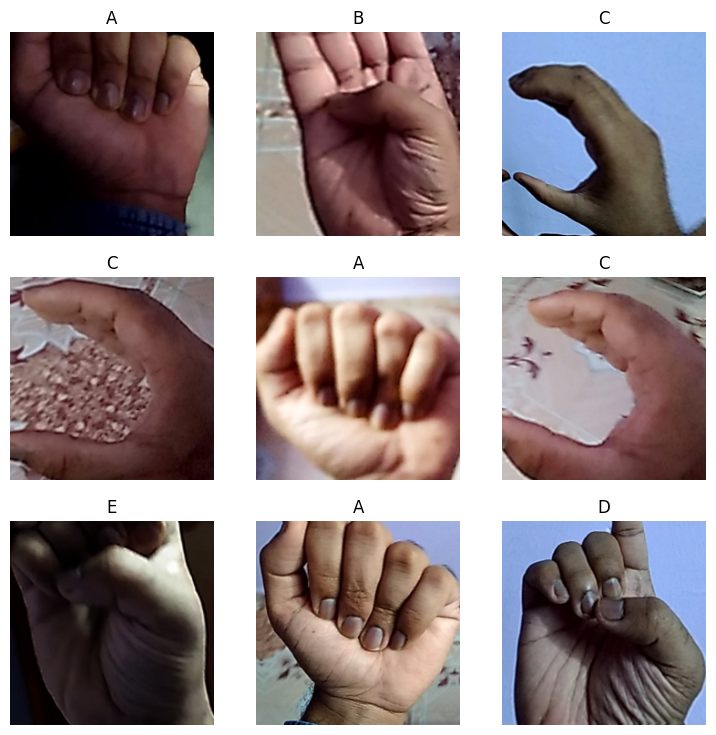

In [5]:
# Show a batch of data
dls.show_batch() 

In [6]:
# Access the vocabulary of the label column
dls.vocab

['A', 'B', 'C', 'D', 'E']

In [7]:
# Get one batch of data as tensors
x, y = dls.one_batch()

In [8]:
# Get the total number of items in the dataset
dls.n

1652

* Class Labels: 'A', 'B', 'C', 'D', 'E'
* Total images: 1652

In [9]:
# For Model Evaluation
f1_macro = F1ScoreMulti(thresh=0.5, average='macro')
f1_macro.name = 'F1(macro)'
f1_samples = F1ScoreMulti(thresh=0.5, average='samples')
f1_samples.name = 'F1(samples)'

`f1_macro` and `f1_samples` are two ways of measuring how good a model is at predicting multiple labels for each image.

```python
f1_macro = F1ScoreMulti(thresh=0.5, average='macro')
```
* **`thresh=0.5:`** means that the model will say yes or no to each label based on how confident it is. If it is more than 50% confident, it will say yes, otherwise it will say no.
* **`average='macro':`** means that the model will get a score for each label and then average them together. This gives equal importance to each label.

* **`average='samples':`** means that the model will get a score for each image and then average them together. This gives equal importance to each image.

`f1_macro.name = 'F1(macro)'` and `f1_samples.name = 'F1(samples)'` are just names for these two ways of measuring the model’s performance. They will be shown when the model is trained or tested.

In [10]:
learn = vision_learner(
    dls, 
    resnet50, 
    metrics=[partial(accuracy_multi, thresh=0.5), 
    f1_macro, 
    f1_samples])

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 102MB/s]


```python
learn = vision_learner(
    dls, 
    resnet50, 
    metrics=[partial(accuracy_multi, thresh=0.5), 
    f1_macro, 
    f1_samples])
```

This line of code creates a learner object that combines the data(dls) and the model(resnet50) for training, and uses **transfer learning** to fine-tune a pretrained model.

* **`dls:`** The data loaders that contain the training and validation data for your model. You can create them from a folder of images with multiple labels.
* **`resnet50:`** The model architecture that you want to use for your task. This is a convolutional neural network that has 50 layers and is pretrained on the **ImageNet** database. The function will automatically create the appropriate head for your model based on your data.
* **`metrics:`** A list of metrics to use for evaluating your model performance during training and validation. In this case, they are a partial function that computes the accuracy for multi-label classification using a threshold of 0.5, and two instances of F1ScoreMulti that measure the F1 score for each label and each sample. 

The function will display these metrics after each epoch of training and validation.
The learner object can be used to train and test the model using various methods, such as fit, fit_one_cycle, lr_find, predict, etc.

In [ ]:
# pick a good learning rate
learn.lr_find(end_lr=1e-2)

This line of code uses the lr_find method of the learner object to find the optimal learning rate for our model and data. It trains our model for a few iterations while increasing the learning rate exponentially, and plots the loss versus the learning rate. You can then choose a learning rate that gives you the fastest decrease in loss.

The `end_lr` argument specifies the maximum learning rate to try. By default, it is 10, but you can lower it if you want to zoom in on a smaller range of learning rates. In this case, it is set to 0.01, which means the method will try learning rates from 1e-7 to 0.012.

The method returns four values: `lr_min, lr_steep, lr_valley, and lr_slide`. These are suggested learning rates based on different criteria:

* **`lr_min:`** The learning rate that gives the minimum loss.
* **`lr_steep:`** The learning rate that gives the steepest gradient (i.e. the largest negative slope) in the plot.
* **`lr_valley:`** The learning rate that is closest to the bottom of a valley in the plot.
* **`lr_slide:`** The learning rate that has the largest negative slope while sliding along the curve.

In [ ]:
# save the model with name "lr_find_model" as it takes too much time
learn.save(
    "lr_find_model",
    path="/content/drive/MyDrive/STEMpedia/saved_model"
)

# load the model with the name "lr_find_model" from the specified path
learn.load(
    "lr_find_model", 
    path="/content/drive/MyDrive/STEMpedia/saved_model"
) 

In [ ]:
# fine tune
learn.fine_tune(2, 1e-5)

The above line of code uses the fastai library to fine-tune a learner object on the dataset(dls). 
* The first argument `epochs` (2):  is the number of epochs to train the model for. 
* The second argument `lr` (1e-5): is the base learning rate to use for the optimizer. 

* **`Fine-tuning:`** is a common technique to adapt a pre-trained model to a new task or domain by updating its parameters with a smaller learning rate.
* **`epochs:`** a term used in machine learning to describe one complete pass through the entire training dataset. For example, we are having 1652 pictures of different sign languages, and we want the model to learn how to tell them apart, one complete passthrough means that the model has looked at all 1652 pictures once and tried to guess which ones are A or B or C or D. Then it can learn from its mistakes and improve.
* **`learning rate(lr):`** A learning rate is a number that controls how much the model changes based on the data it sees. A learning rate is usually a small number between 0 and 1. A higher learning rate means that the model changes faster, but it may also miss the best solution or bounce around. A lower learning rate means that the model changes slower, but it may also take too long to find the best solution or get stuck in a bad solution. The learning rate is one of the most important choices you have to make when training a model.

In [ ]:
# save the model with name "fine_tuned_model" as it takes too much time
learn.save(
    "fine_tuned_model",
    path="/content/drive/MyDrive/STEMpedia/saved_model"
)

# load the model with the name "fine_tuned_model" from the specified path
learn.load(
    "fine_tuned_model", 
    path="/content/drive/MyDrive/STEMpedia/saved_model"
) 


In [ ]:
learn.export(
    "fine_tuned_model.pkl",
    path="/content/drive/MyDrive/STEMpedia/saved_model"
)